In this Project, we will develop basic movie recommendation system using Python and Pandas.

So, we will develop a basic recommendation system that tells you what movies are most similar to your movie choice.

Let's get started!

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# Getting the data

In [6]:
column_names= ['user_id', 'item_id', 'rating', 'timestamp'] 
df= pd.read_csv('u.data', sep='\t', names=column_names) 

In [7]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Getting the movie titles

In [8]:
movie_titles= pd.read_csv('Movie_Id_Titles') 
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
df= pd.merge(df, movie_titles, on= 'item_id') 

In [10]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# Exploratory Data Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [12]:
df.groupby('title')['rating'].mean().sort_values(ascending= False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [14]:
df.groupby('title')['rating'].count().sort_values(ascending= False).head() 

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [16]:
ratings= pd.DataFrame(df.groupby('title')['rating'].mean()) 
ratings.head() 

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [17]:
ratings['No. of ratings']= pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,No. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


# Visualizing 

<Axes: >

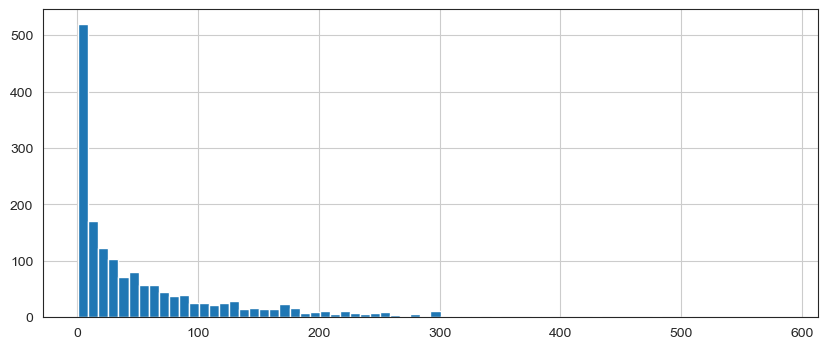

In [20]:
plt.figure(figsize=(10,4))
ratings['No. of ratings'].hist(bins=70) 

<Axes: >

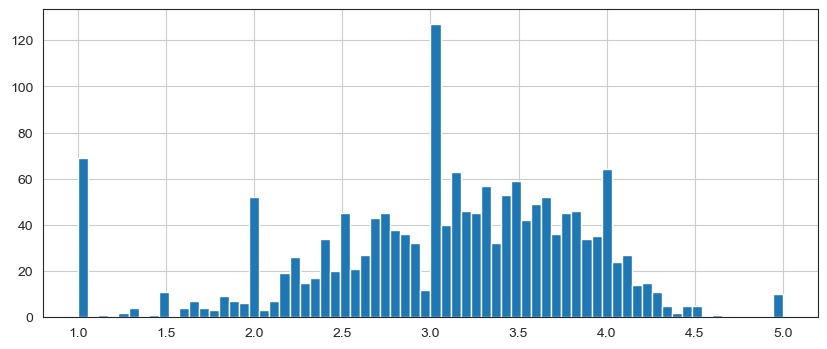

In [21]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70) 

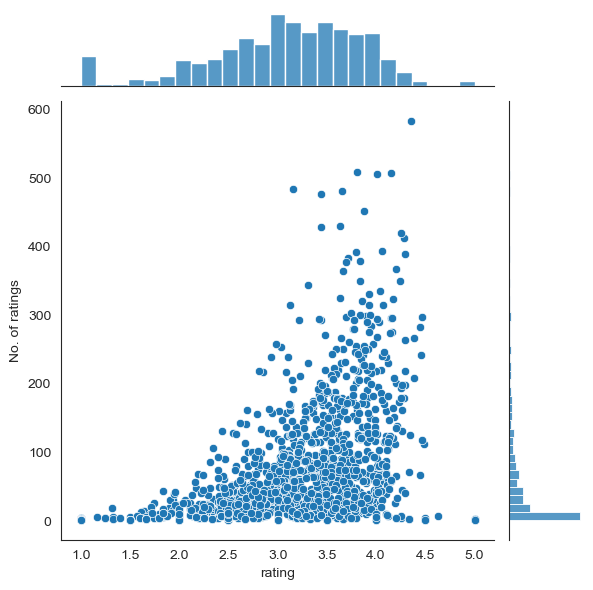

In [22]:
sns.jointplot(data= ratings, x='rating', y= 'No. of ratings') 

# Creating Recommendation System

In [23]:
moviematrix= df.pivot_table(index= 'user_id', columns= 'title', values= 'rating')
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie:

In [24]:
ratings.sort_values('No. of ratings', ascending= False) 

,rating,No. of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


Let's consider the movies - Star Wars and Liar Liar

In [28]:
starwars_user_ratings= moviematrix['Star Wars (1977)']
LiarLiar_user_ratings= moviematrix['Liar Liar (1997)']  

In [29]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

Using corrwith() method to get correlations between two pandas series

In [31]:
similar_to_starwars= moviematrix.corrwith(starwars_user_ratings) 
similar_to_LiarLiar= moviematrix.corrwith(LiarLiar_user_ratings) 

D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [32]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

Using a dataframe instead of series

In [33]:
corr_starwars= pd.DataFrame(similar_to_starwars, columns= ['Correlation']) 

In [35]:
corr_starwars.head(20)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
3 Ninjas: High Noon At Mega Mountain (1998),NaN


Removing NaN VALUES

In [36]:
corr_starwars.dropna(inplace= True) 

In [37]:
corr_starwars.head(20)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [38]:
corr_starwars.sort_values('Correlation', ascending= False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Let's fix this by filtering out movies that have less than 100 reviews

In [40]:
corr_starwars = corr_starwars.join(ratings['No. of ratings'])
corr_starwars.head() 

,Correlation,No. of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [41]:
corr_starwars[corr_starwars['No. of ratings']>100].sort_values('Correlation', ascending= False).head()

,Correlation,No. of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Now the same for Liar Liar

In [42]:
similar_to_LiarLiar.head()

title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

In [43]:
corr_LiarLiar= pd.DataFrame(similar_to_LiarLiar, columns= ['Correlation']) 

In [44]:
corr_LiarLiar.head(20) 

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
"20,000 Leagues Under the Sea (1954)",-0.027932
2001: A Space Odyssey (1968),-0.057864
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [46]:
corr_LiarLiar.dropna(inplace= True) 

In [47]:
corr_LiarLiar.sort_values('Correlation', ascending= False).head(10) 

,Correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
Mina Tannenbaum (1994),1.0
"Stranger, The (1994)",1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Legal Deceit (1997),1.0


In [48]:
corr_LiarLiar = corr_LiarLiar.join(ratings['No. of ratings'])
corr_starwars.head() 

,Correlation,No. of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [49]:
corr_LiarLiar[corr_LiarLiar['No. of ratings']>100].sort_values('Correlation', ascending= False).head() 

,Correlation,No. of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


Thank You!